In [1]:
from pytket.pyquil import tk_to_pyquil, pyquil_to_tk
from pyquil import Program
from pyquil.latex import display
from pytket.utils import Graph
from pytket.backends.forest import ForestBackend
from pytket.routing import Placement
from pytket.passes import DefaultMappingPass, FullMappingPass

In [2]:
# Read the program
p = Program("""

DECLARE ro BIT[3]
H 0
H 1
H 1
CPHASE(0.0) 1 0
H 0
H 2
CNOT 2 3
CNOT 2 4
CPHASE(0.0) 1 2
CPHASE(0.0) 0 2
H 2
MEASURE 0 ro[0]
MEASURE 1 ro[1]
MEASURE 2 ro[2]

""")

In [3]:
str(p)

'DECLARE ro BIT[3]\nH 0\nH 1\nH 1\nCPHASE(0) 1 0\nH 0\nH 2\nCNOT 2 3\nCNOT 2 4\nCPHASE(0) 1 2\nCPHASE(0) 0 2\nH 2\nMEASURE 0 ro[0]\nMEASURE 1 ro[1]\nMEASURE 2 ro[2]\n'

In [4]:
circuit = pyquil_to_tk(p)

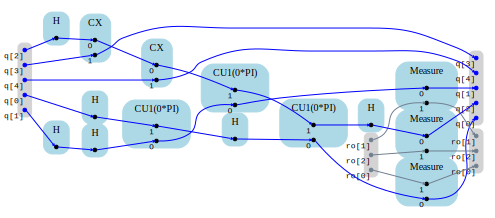

In [5]:
Graph(circuit).get_DAG()

In [6]:
backend = ForestBackend("9q-square-qvm")

/home/tim/anaconda3/envs/planqk/lib/python3.7/site-packages/pyquil/api/_compiler.py:480: UserWarning: Request to quilc at tcp://127.0.0.1:5555 timed out. This could mean that quilc is not running, is not reachable, or is responding slowly.. Compilation using quilc will not be available.
  warnings.warn(f"{e}. Compilation using quilc will not be available.")


In [7]:
backend.compile_circuit(circuit)

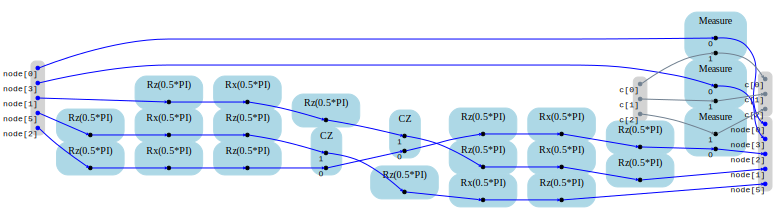

In [8]:
Graph(circuit).get_DAG()

In [9]:
p_opt = tk_to_pyquil(circuit)

In [10]:
str(p_opt)

'DECLARE ro BIT[3]\nRZ(pi/2) 1\nRZ(pi/2) 2\nRZ(pi/2) 5\nRX(pi/2) 1\nRX(pi/2) 2\nRX(pi/2) 5\nRZ(pi/2) 1\nRZ(pi/2) 2\nRZ(pi/2) 5\nCZ 2 5\nCZ 2 1\nRZ(pi/2) 5\nRZ(pi/2) 1\nRZ(pi/2) 2\nRX(pi/2) 5\nRX(pi/2) 1\nRX(pi/2) 2\nRZ(pi/2) 5\nRZ(pi/2) 1\nRZ(pi/2) 2\nMEASURE 0 ro[0]\nMEASURE 3 ro[1]\nMEASURE 2 ro[2]\n'

In [11]:
circuit = pyquil_to_tk(p_opt)

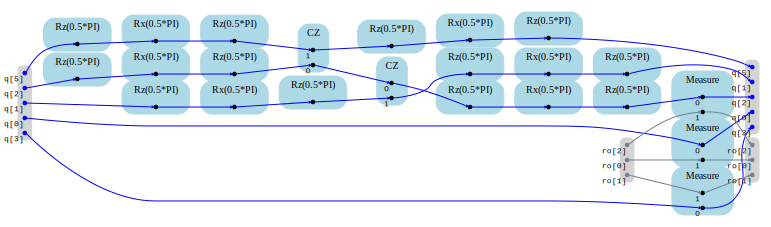

In [12]:
Graph(circuit).get_DAG()

In [13]:
[pred] = list(filter(lambda p: not p.verify(circuit),backend.required_predicates))
pred

ConnectivityPredicate:{ Nodes: 9, Edges: 24 }

In [14]:
dir(pred)

['__class__',
 '__delattr__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'implies',
 'verify']

In [15]:
backend.device.architecture.nodes[0].reg_name

'node'

In [16]:
naive_placement = {}
for q, n in zip(circuit.qubits, backend.device.nodes):
    naive_placement[q] = n

naive_placement

{q[0]: node[0], q[1]: node[1], q[2]: node[2], q[3]: node[3], q[5]: node[4]}

In [17]:
#Placement(backend.device).place_with_map(circuit, naive_placement)

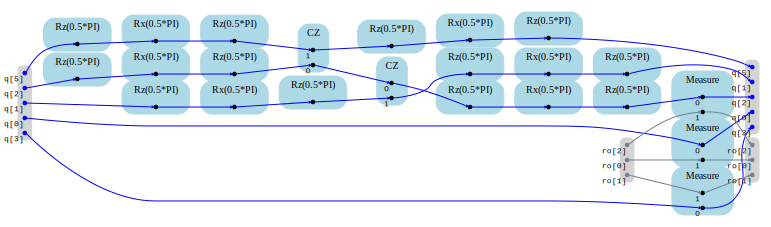

In [18]:
Graph(circuit).get_DAG()

In [20]:
DefaultMappingPass(backend.device).apply(circuit)

True

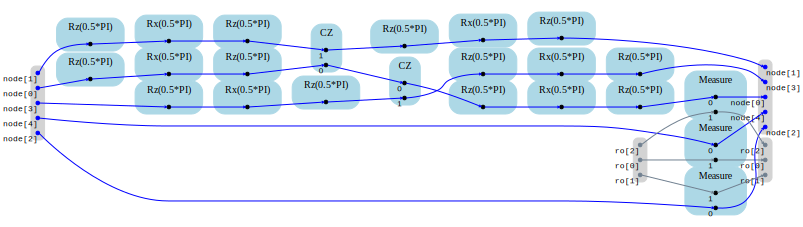

In [21]:
Graph(circuit).get_DAG()

In [22]:
backend.valid_circuit(circuit)

True